In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Image
import requests
from PIL import Image as PILImage
from io import BytesIO
import requests
import pandas as pd
import threading

In [4]:
df = pd.read_csv('data1.2.csv',index_col=False)

In [5]:
len(df)

4411

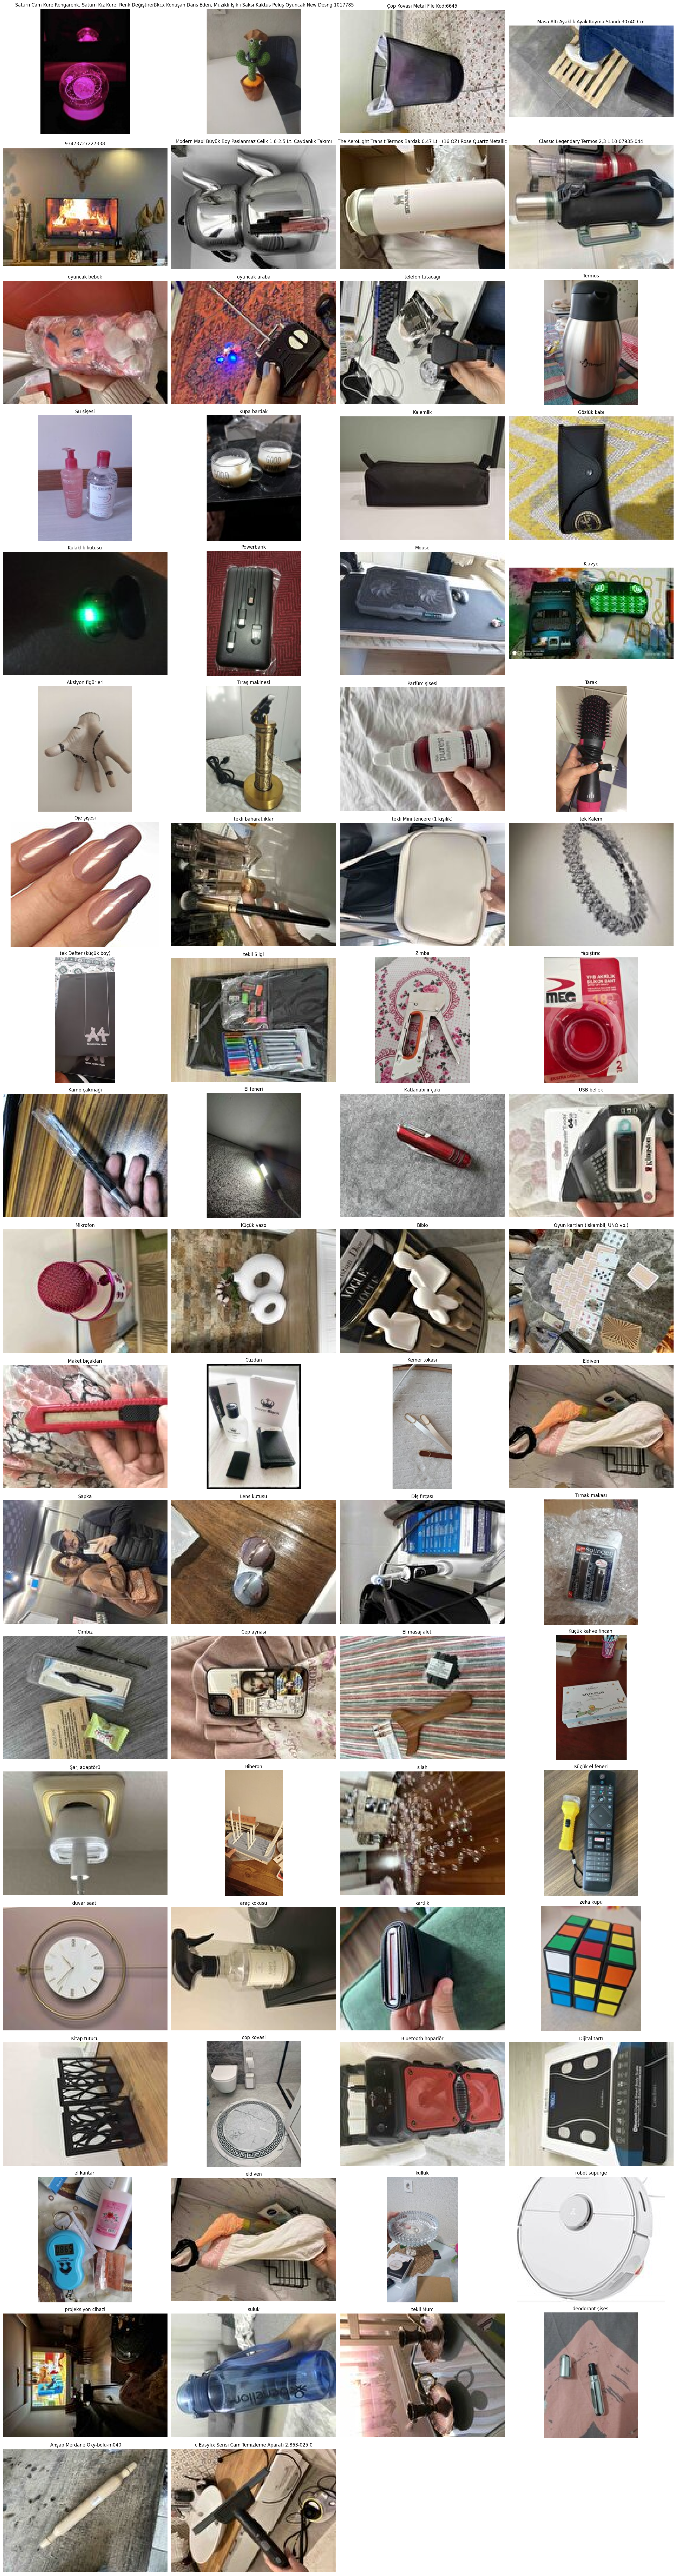

In [7]:
row_number = len(df['searched_key_word'].unique())//4 + 1
fig, axes = plt.subplots(nrows=row_number, ncols=4, figsize=(25, 5*row_number))
plt.axis('off')

col = 0
row = 0
for i in df['searched_key_word'].unique():
    image_path = df['image_path'][df['searched_key_word']== i ].head(1).values[0]

    response = requests.get(image_path)  # Resmi URL'den al
    img = PILImage.open(BytesIO(response.content))  # Resmi PIL ile aç
    axes[row, col].imshow(img)
    axes[row, col].set_title(i)
    axes[row, col].axis('off')
    col += 1

    if col == 4:
        col = 0
        row += 1

for r in range(row_number):
    for c in range(4):
        if r * 4 + c >= len(df['searched_key_word'].unique()):
            axes[r, c].axis('off')  # Kullanılmayan eksenleri kapat

plt.tight_layout()
plt.show()

In [ ]:
df['searched_key_word'].unique()


In [ ]:


def download_image(photo_url, file_name):
    response = requests.get(photo_url)
    with open(file_name, 'wb') as file:
        file.write(response.content)
    print(f"{file_name} indirildi.")

# DataFrame'i oku
df = pd.read_csv('your_dataframe.csv')

threads = []
for index, row in df.iterrows():
    photo_url = row['photo_url']
    photo_name = row['photo_name']  # Fotoğraf adını al
    file_name = f"/path/to/download/directory/{photo_name}.jpg"
    
    # Her indirme için bir thread oluştur
    thread = threading.Thread(target=download_image, args=(photo_url, file_name))
    threads.append(thread)
    thread.start()

# Tüm threadlerin bitmesini bekle
for thread in threads:
    thread.join()

print("Tüm fotoğraflar indirildi.")
